In [2]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [18]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

data['G_MP'] = data['G_MV'] * data['G_MA']

data

F_RunState  F_OperationTime  F_CuttingTime  F_CycleTime  \
GDatetime                                                                      
2023-06-05 07:03:45           2         901411.0       111121.0            0   
2023-06-05 07:03:46           2         901411.0       111121.0            0   
2023-06-05 07:03:47           2         901411.0       111121.0            0   
2023-06-05 07:03:48           2         901411.0       111121.0            0   
2023-06-05 07:03:49           2         901411.0       111121.0            0   
...                         ...              ...            ...          ...   
2023-07-02 23:59:55           0              0.0            0.0            0   
2023-07-02 23:59:56           0              0.0            0.0            0   
2023-07-02 23:59:57           0              0.0            0.0            0   
2023-07-02 23:59:58           0              0.0            0.0            0   
2023-07-02 23:59:59           0              0.0            0.0            0   

                     F_SpindleRPM1  F_SpindleTroq1  F_SpindleGearRatio1  \
GDatetime                                                                 
2023-06-05 07:03:45            0.0             0.0                  0.0   
2023-06-05 07:03:46            0.0             0.0                  0.0   
2023-06-05 07:03:47            0.0             0.0                  0.0   
2023-06-05 07:03:48            0.0             0.0                  0.0   
2023-06-05 07:03:49            0.0             0.0                  0.0   
...                            ...             ...                  ...   
2023-07-02 23:59:55            0.0             0.0                  0.0   
2023-07-02 23:59:56            0.0             0.0                  0.0   
2023-07-02 23:59:57            0.0             0.0                  0.0   
2023-07-02 23:59:58            0.0             0.0                  0.0   
2023-07-02 23:59:59            0.0             0.0                  0.0   

                     F_ToolNum     G_ADC1     G_ADC2  G_ADC3  G_ADC4  \
GDatetime                                                              
2023-06-05 07:03:45        0.0  24.400000  43.700001     0.0    0.56   
2023-06-05 07:03:46        0.0  24.400000  43.700001     0.0    0.56   
2023-06-05 07:03:47        0.0  24.400000  43.700001     0.0    0.56   
2023-06-05 07:03:48        0.0  24.400000  43.700001     0.0    0.56   
2023-06-05 07:03:49        0.0  24.299999  43.700001     0.0    0.56   
...                        ...        ...        ...     ...     ...   
2023-07-02 23:59:55        NaN  29.400000  59.400002     0.0    0.56   
2023-07-02 23:59:56        NaN  29.400000  59.400002     0.0    0.56   
2023-07-02 23:59:57        NaN  29.400000  59.400002     0.0    0.56   
2023-07-02 23:59:58        NaN  29.400000  59.400002     0.0    0.56   
2023-07-02 23:59:59        NaN  29.400000  59.400002     0.0    0.56   

                           G_MV   G_MA  G_MActP  G_MRActP  G_MPF     G_MFeq  \
GDatetime                                                                     
2023-06-05 07:03:45  222.020004  2.974    0.924     0.628  0.701  59.970001   
2023-06-05 07:03:46  221.529999  2.976    0.924     0.624  0.700  59.970001   
2023-06-05 07:03:47  221.529999  2.976    0.924     0.624  0.700  59.970001   
2023-06-05 07:03:48  220.729996  2.976    0.920     0.624  0.700  59.959999   
2023-06-05 07:03:49  221.630005  2.962    0.920     0.628  0.701  59.959999   
...                         ...    ...      ...       ...    ...        ...   
2023-07-02 23:59:55  222.529999  0.064    0.004     0.004  0.255  59.990002   
2023-07-02 23:59:56  222.529999  0.064    0.004     0.004  0.255  59.990002   
2023-07-02 23:59:57  222.679993  0.063    0.004     0.004  0.256  59.990002   
2023-07-02 23:59:58  222.899994  0.063    0.004     0.004  0.257  59.990002   
2023-07-02 23:59:59  222.970001  0.064    0.004     0.004  0.254  59.990002   

                     G_MTemp        G_M

TypeError: list indices must be integers or slices, not tuple

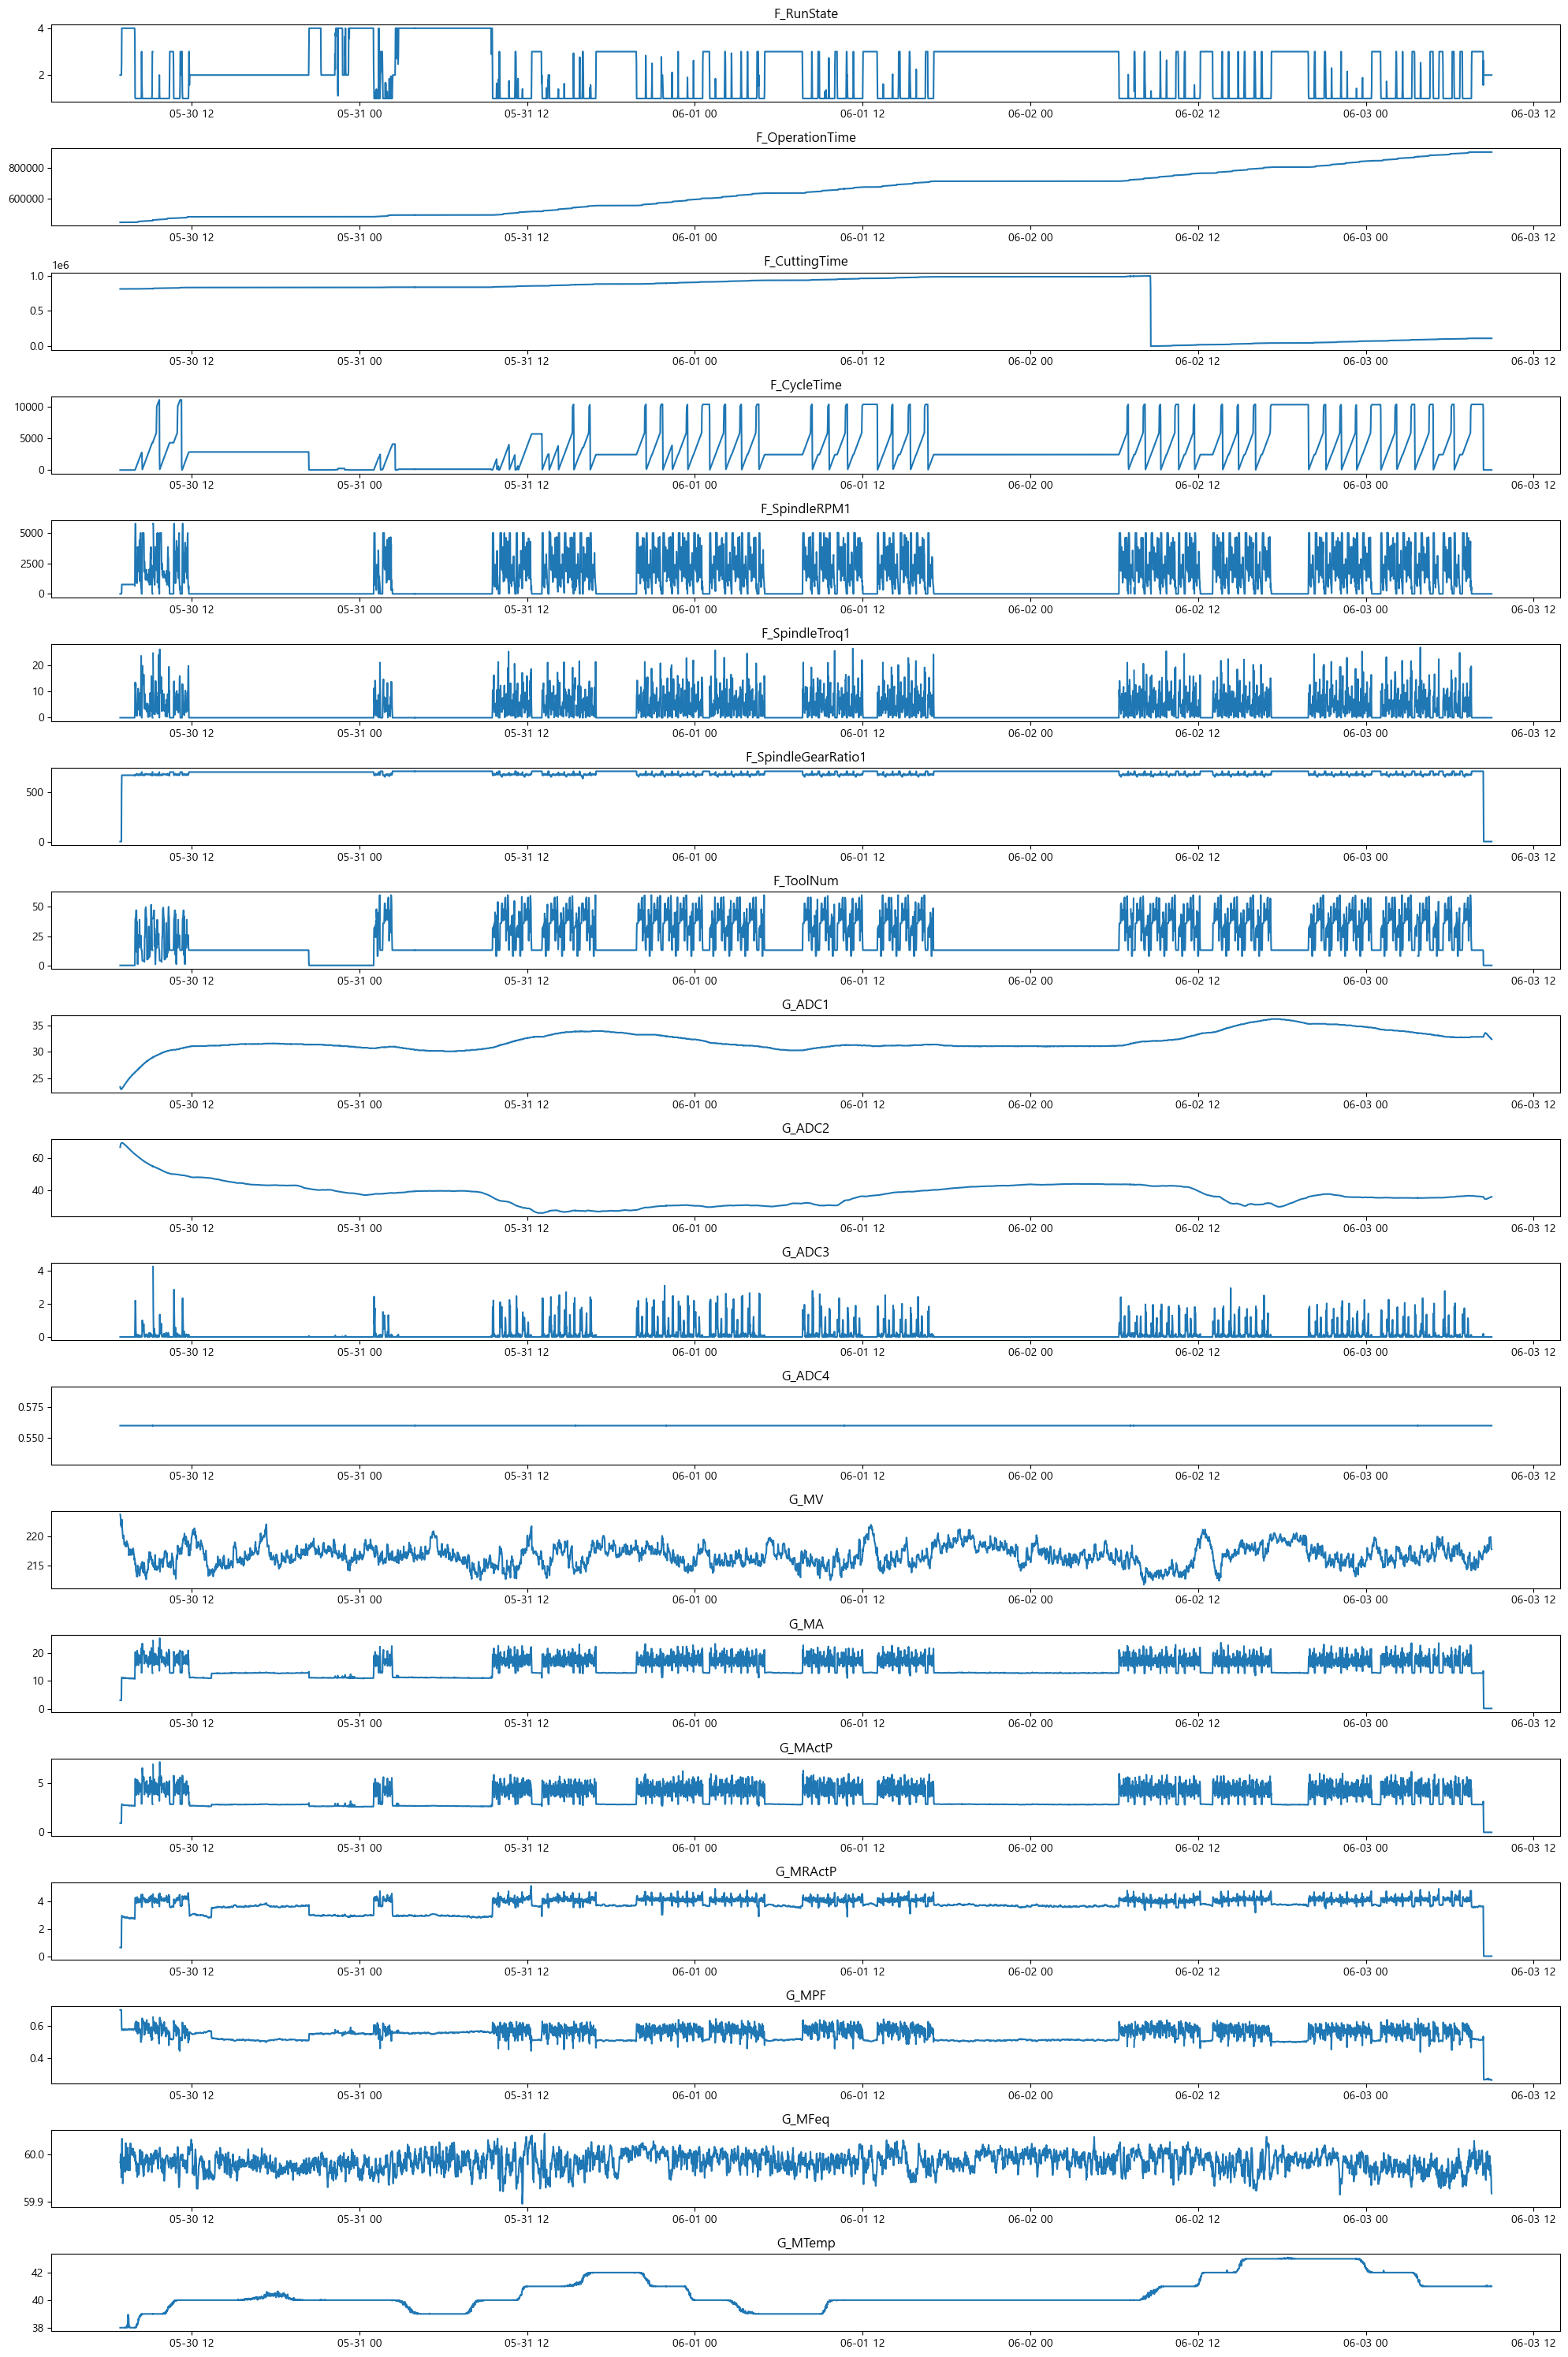

In [6]:
plt.figure(figsize=(20,30))
for i, column in enumerate(df3.columns):
    plt.subplot(len(df3.columns), 1, i + 1)
    plt.plot(df3[column])
    plt.title(column)
plt.tight_layout()
plt.show()

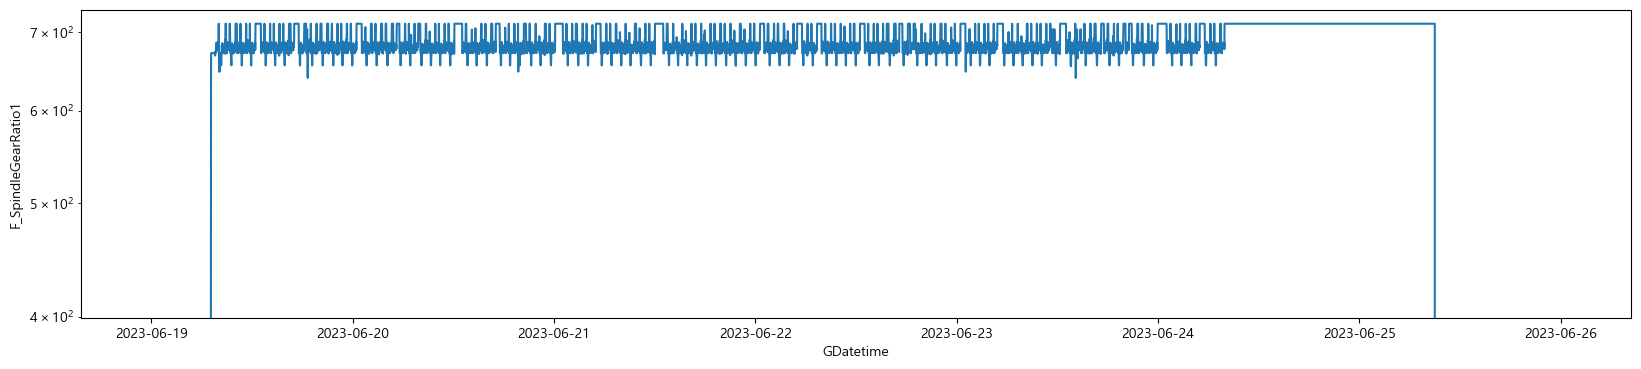

In [6]:
plt.figure(figsize=(20,4))
sns.lineplot(df6['F_SpindleGearRatio1'])
plt.yscale('log')
plt.show()

# df2 에서 df3으로 넘어가면서 다른 제품 공정 

In [12]:
data_ = data.copy()
for i, data in enumerate(data_):
    drange = pd.date_range(start=data.index.astype('str')[0], end=data.index.astype('str')[-1], freq='s')

    fig, ax = plt.subplots(3, 1, figsize=(len(drange)/33000, 5))
    ax[0].plot(data.loc[data.index.min():data.index.max(), 'F_RunState'])
    ax[1].plot(data.loc[data.index.min():data.index.max(), 'F_CycleTime'])
    ax[2].plot(data.loc[data.index.min():data.index.max(), 'F_ToolNum'])
    ax[0].set_title(f'df{i+1} F_RunState')
    ax[1].set_title(f'df{i+1} F_CycleTime')
    ax[2].set_title(f'df{i+1} F_ToolNum')
    plt.tight_layout()
    plt.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'astype'

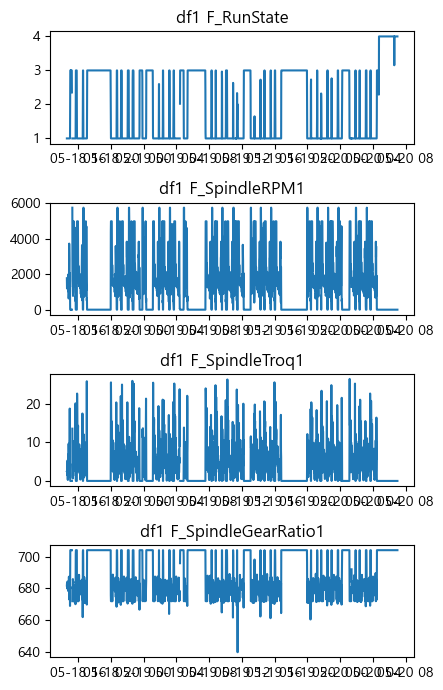

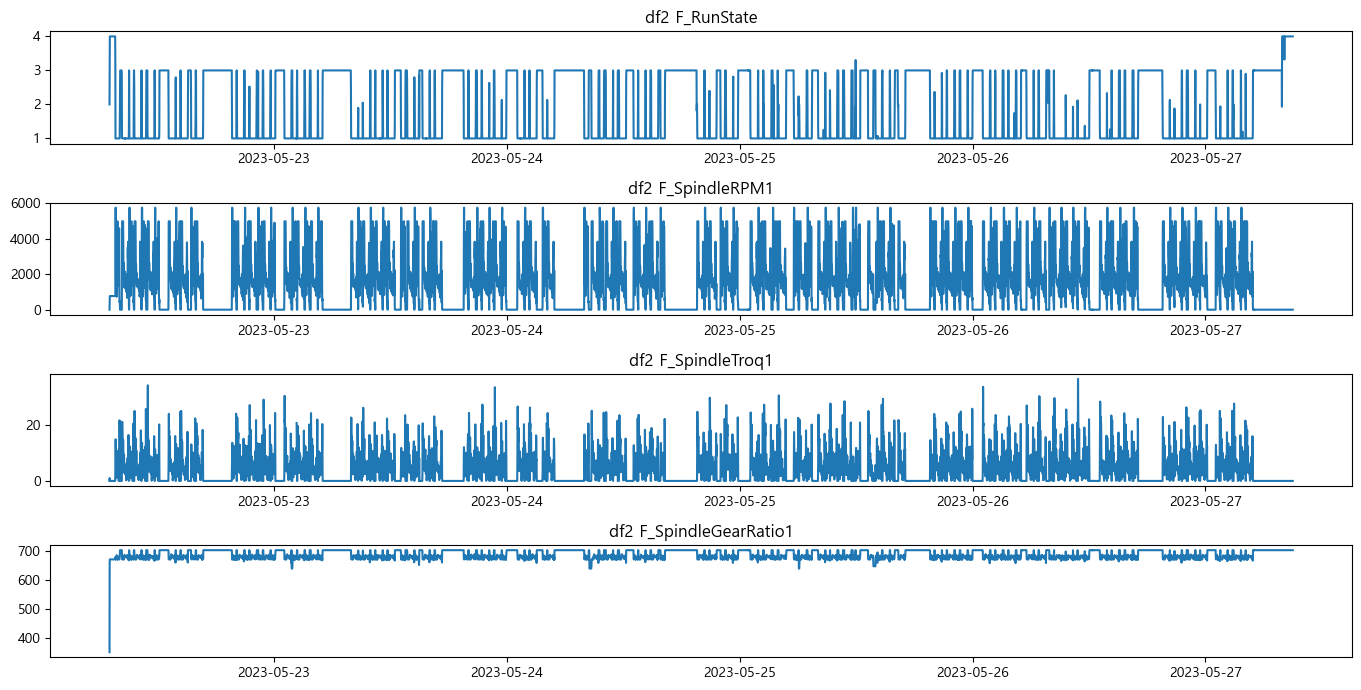

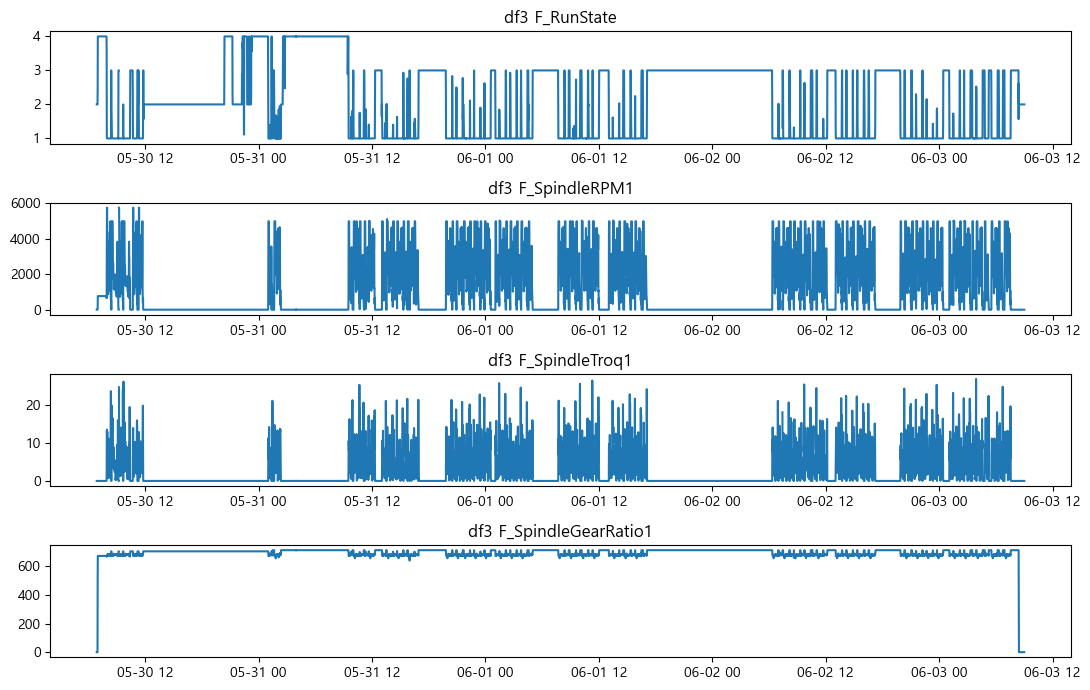

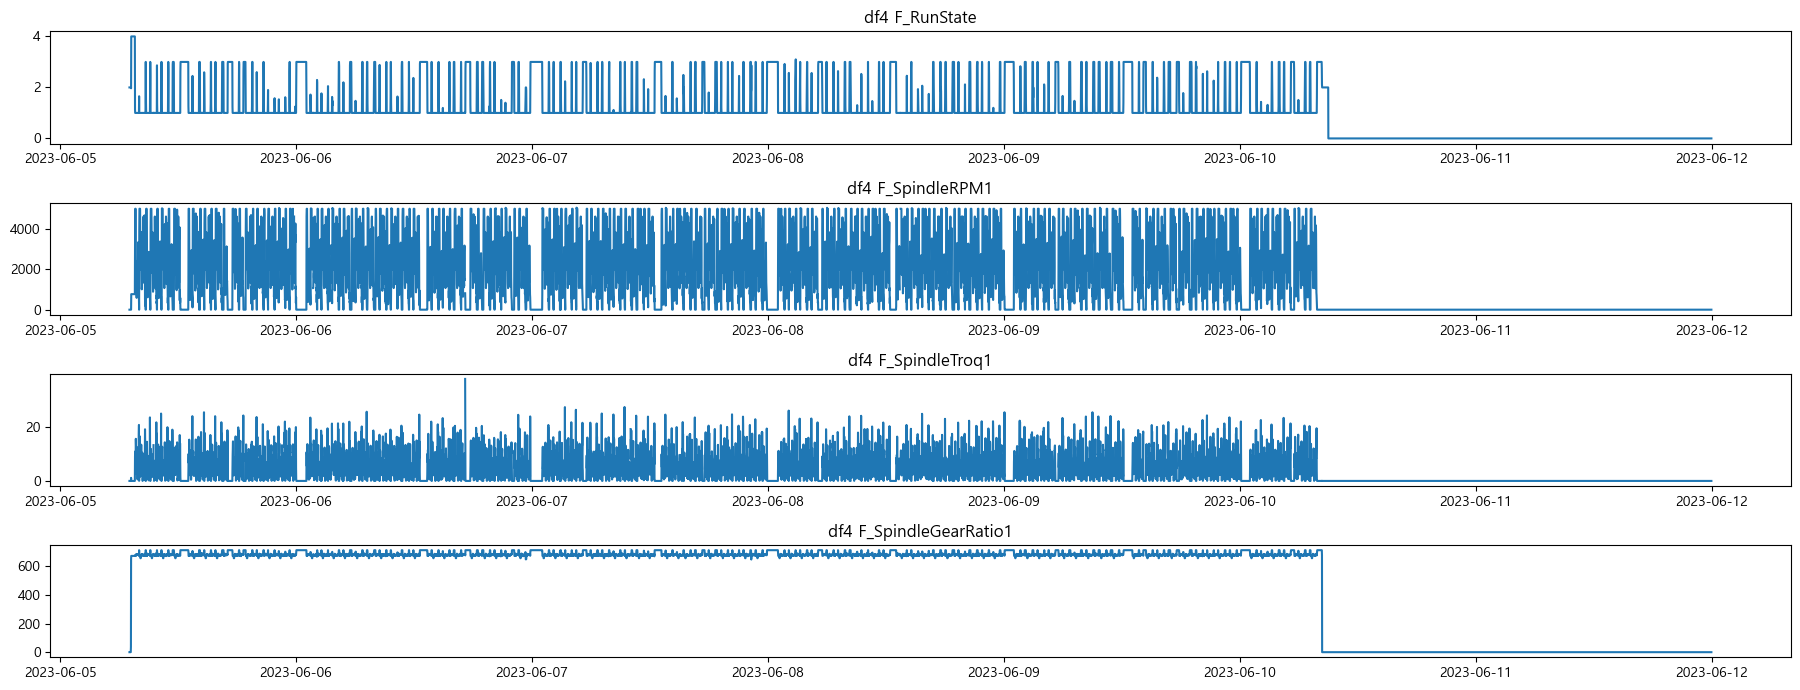

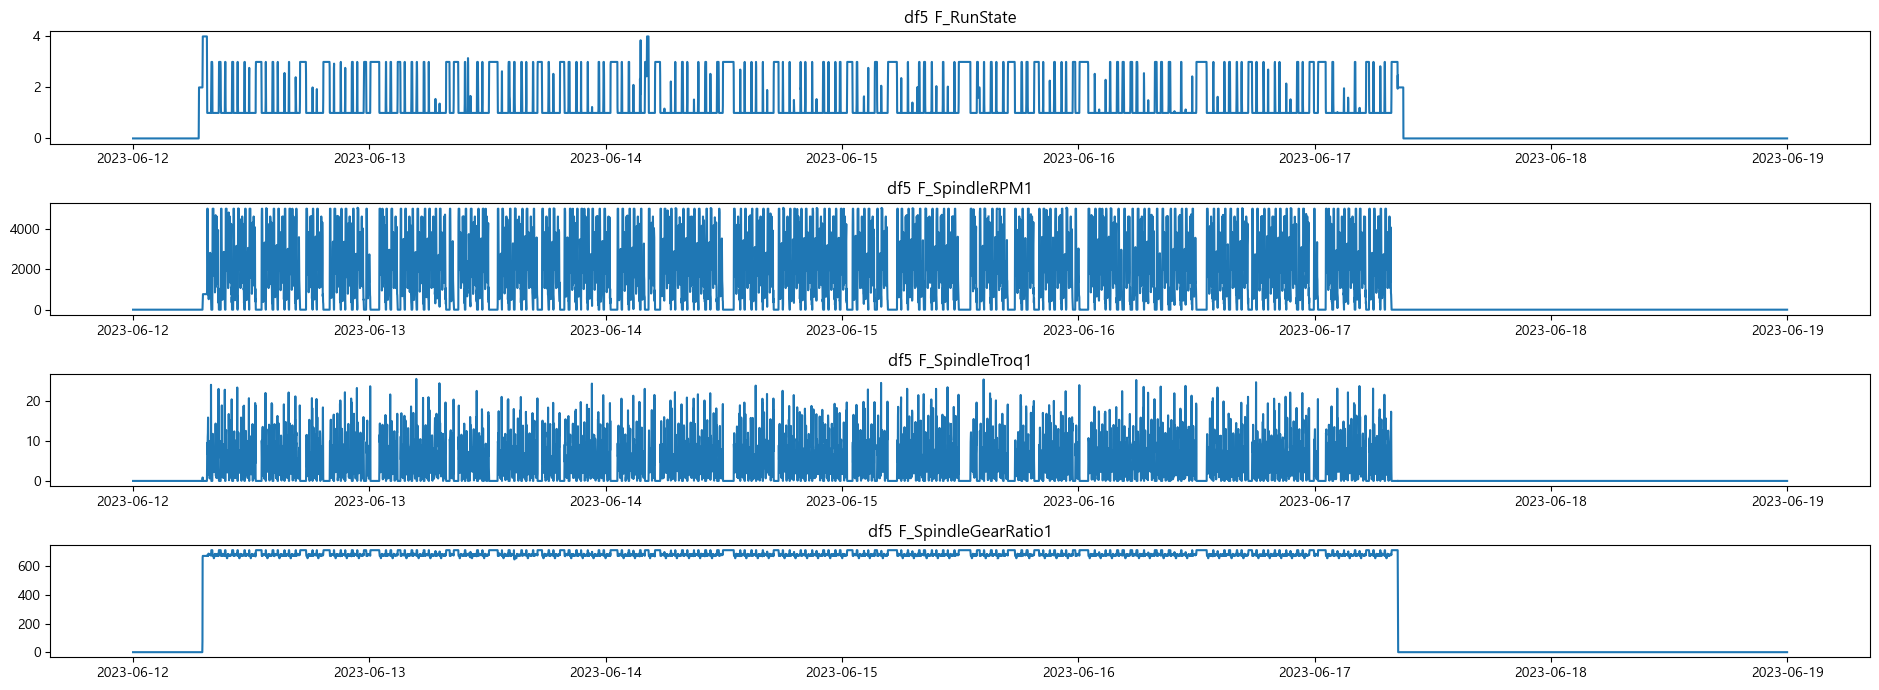

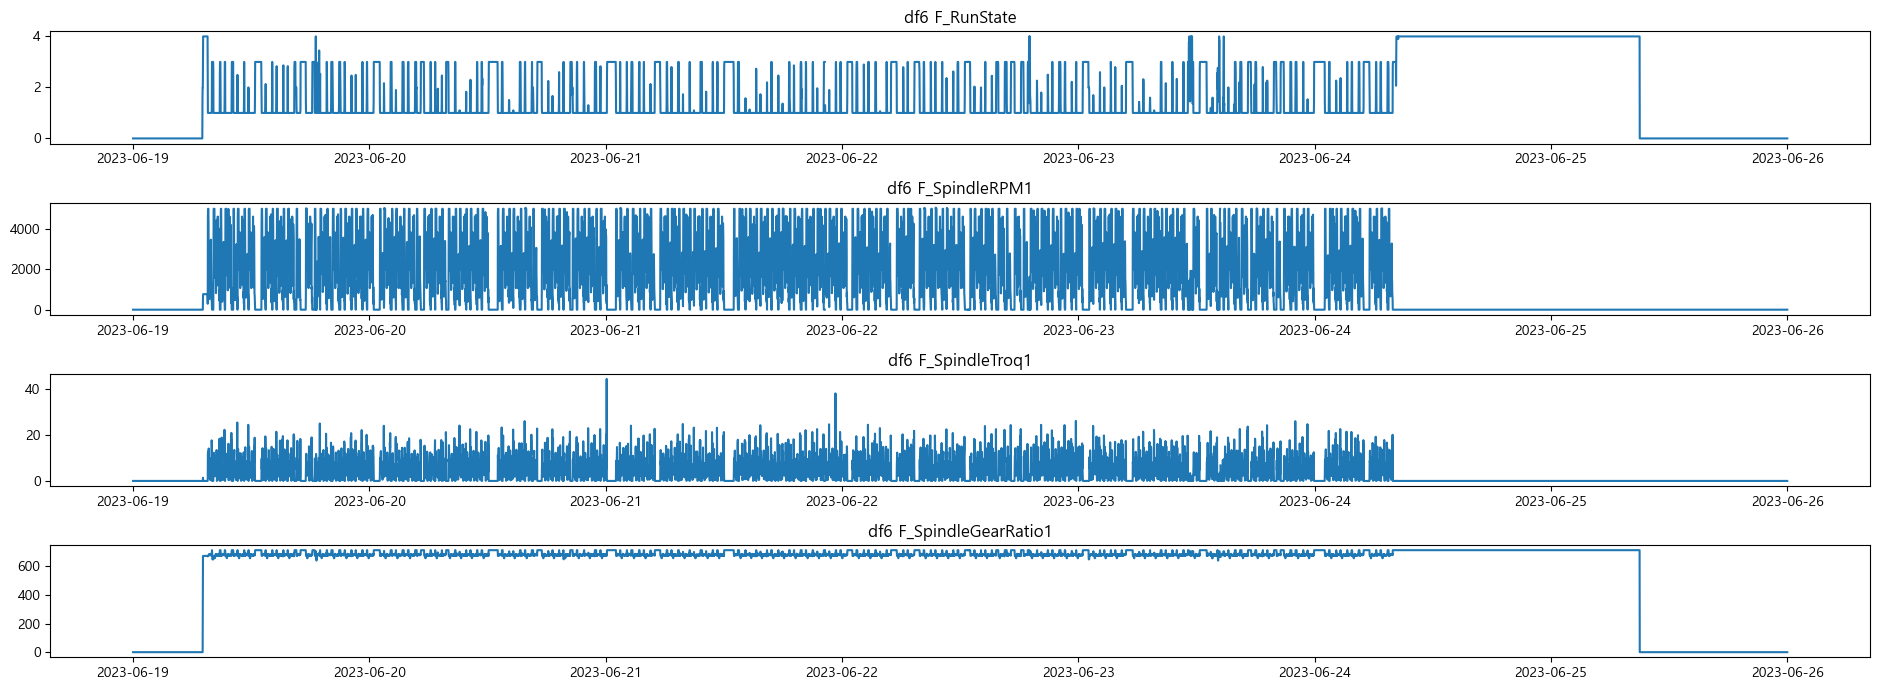

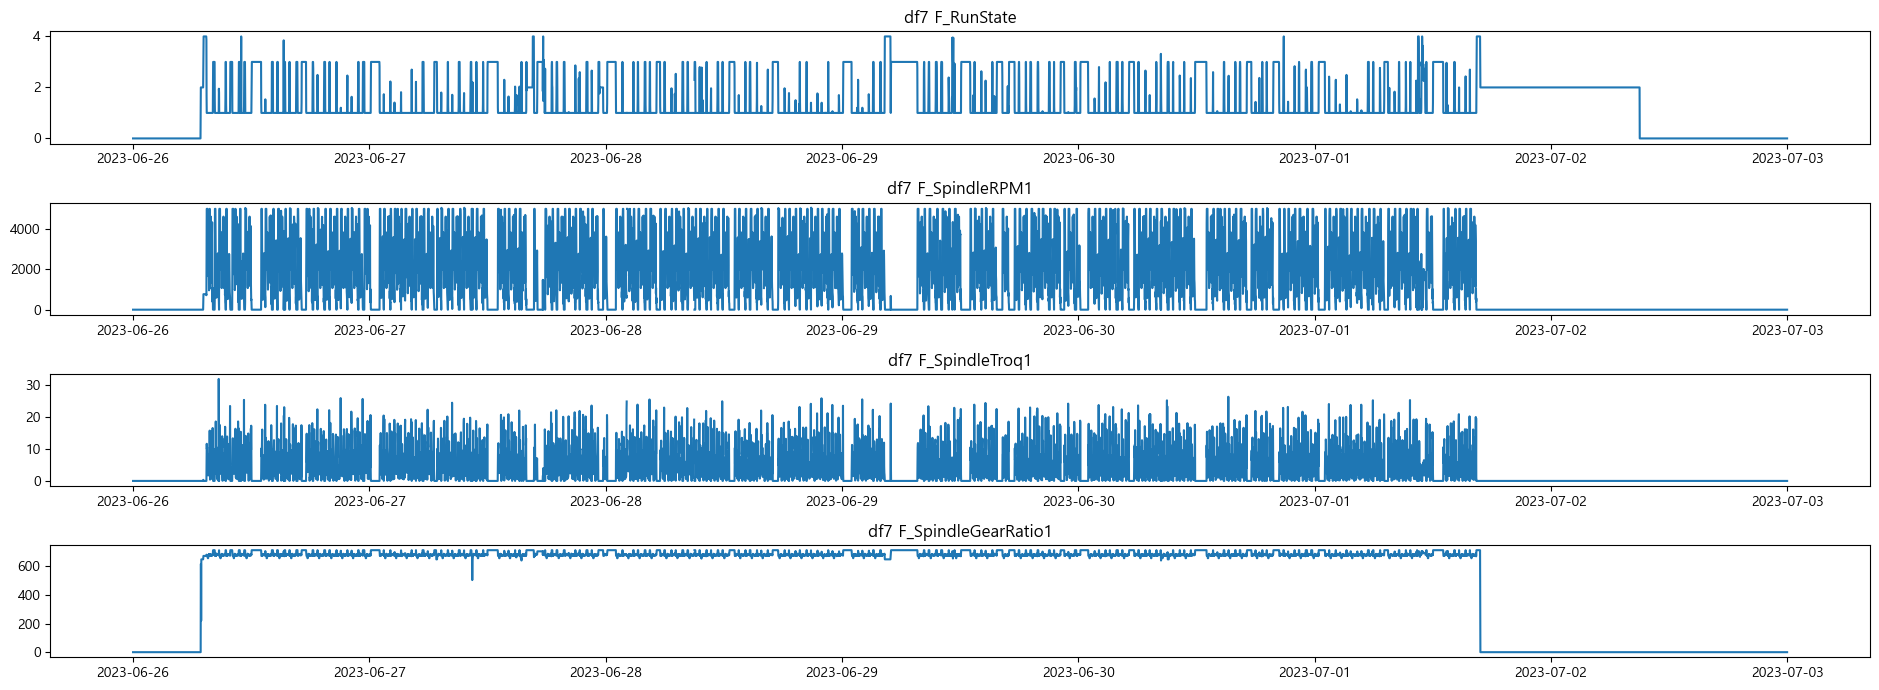

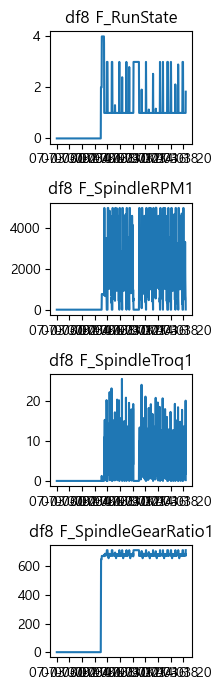

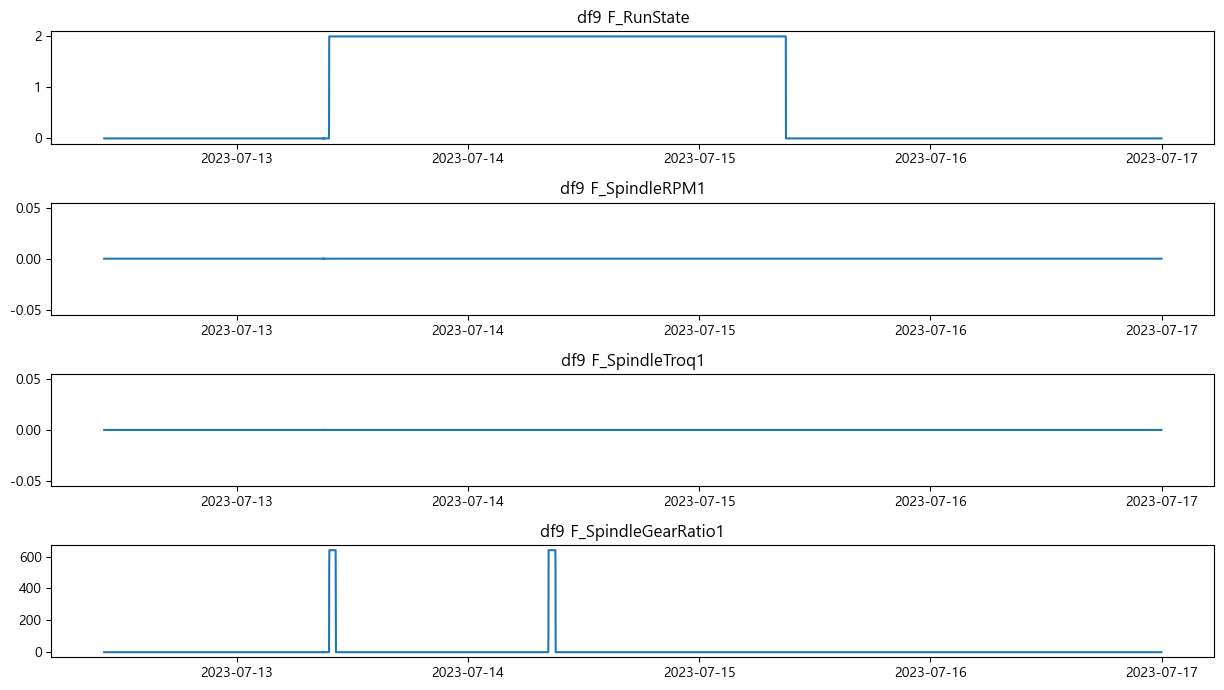

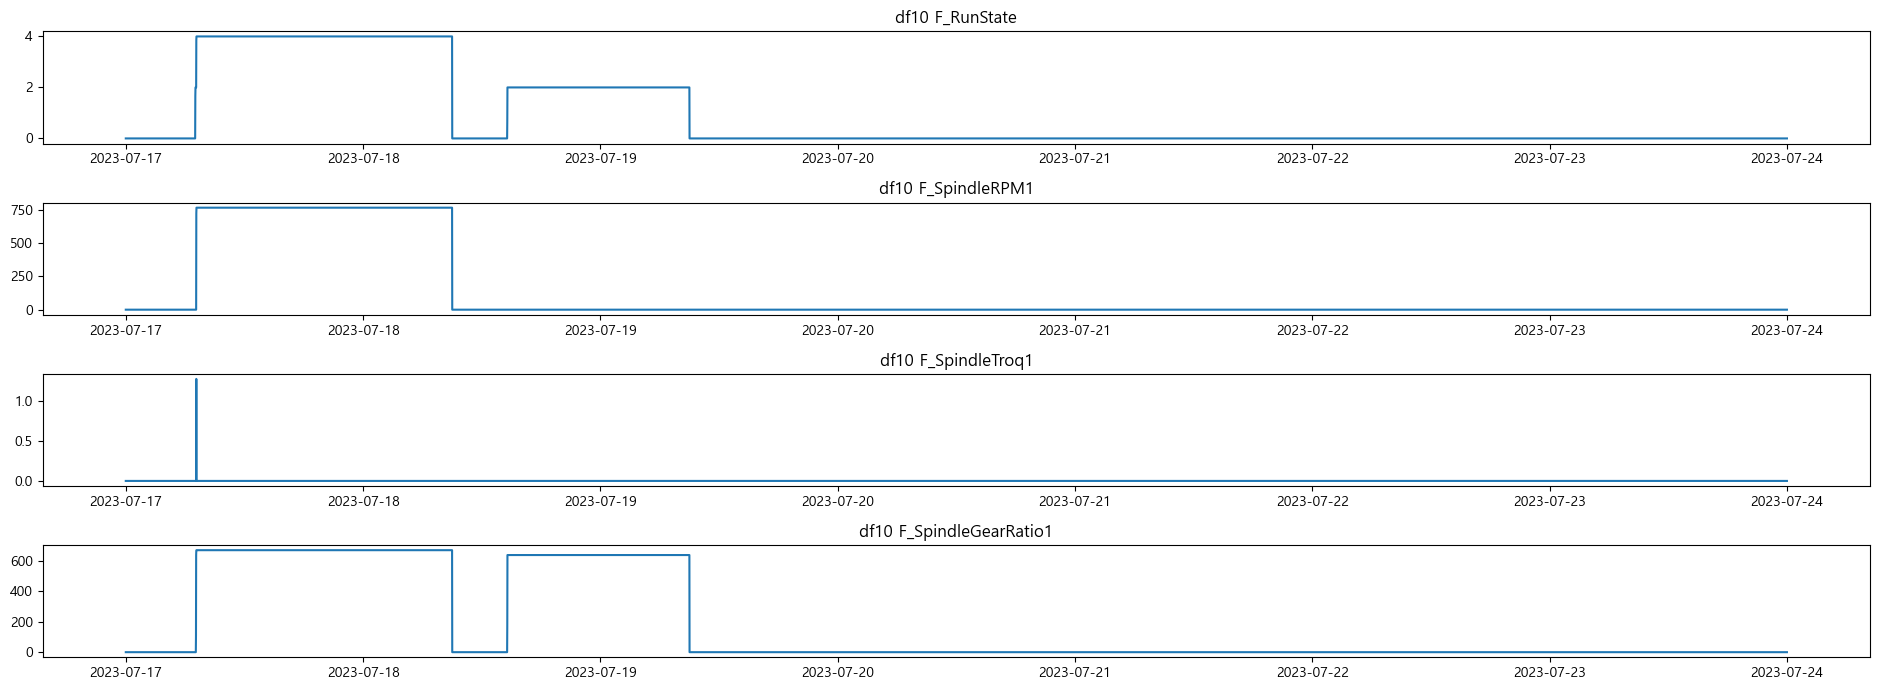

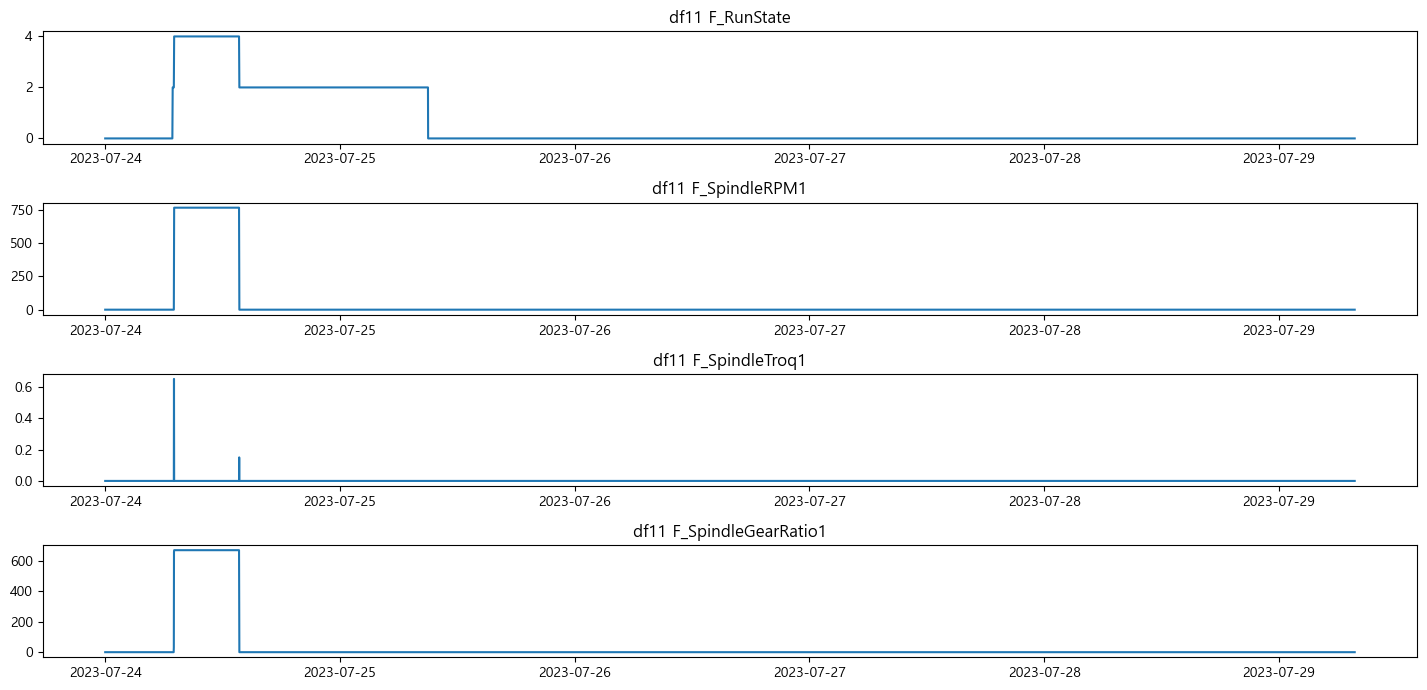

In [ ]:
for i, data in enumerate(data_list):
    drange = pd.date_range(start=data.index.astype('str')[0], end=data.index.astype('str')[-1], freq='s')

    fig, ax = plt.subplots(4, 1, figsize=(len(drange)/32000, 7))
    ax[0].plot(data.loc[data.index.min():data.index.max(), 'F_RunState'])
    ax[1].plot(data.loc[data.index.min():data.index.max(), 'F_SpindleRPM1'])
    ax[2].plot(data.loc[data.index.min():data.index.max(), 'F_SpindleTroq1'])
    ax[3].plot(data.loc[data.index.min():data.index.max(), 'F_SpindleGearRatio1'])
    ax[0].set_title(f'df{i+1} F_RunState')
    ax[1].set_title(f'df{i+1} F_SpindleRPM1')
    ax[2].set_title(f'df{i+1} F_SpindleTroq1')
    ax[3].set_title(f'df{i+1} F_SpindleGearRatio1')
    plt.tight_layout()
    plt.show()

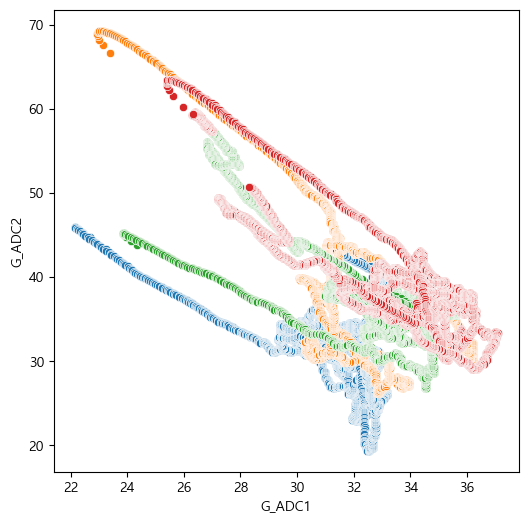

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df2['G_ADC1'], y=df2['G_ADC2'], palette='red')
sns.scatterplot(x=df3['G_ADC1'], y=df3['G_ADC2'], palette='blue')
sns.scatterplot(x=df4['G_ADC1'], y=df4['G_ADC2'], palette='green')
sns.scatterplot(x=df5['G_ADC1'], y=df5['G_ADC2'], palette='purple')
plt.show()

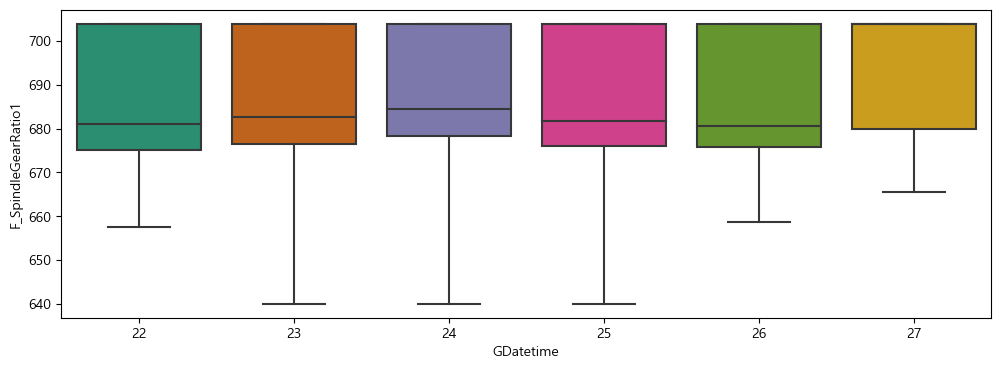

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df2.index.day.astype('str'), y=df2['F_SpindleGearRatio1'], palette='Dark2', showfliers=False)
plt.show()

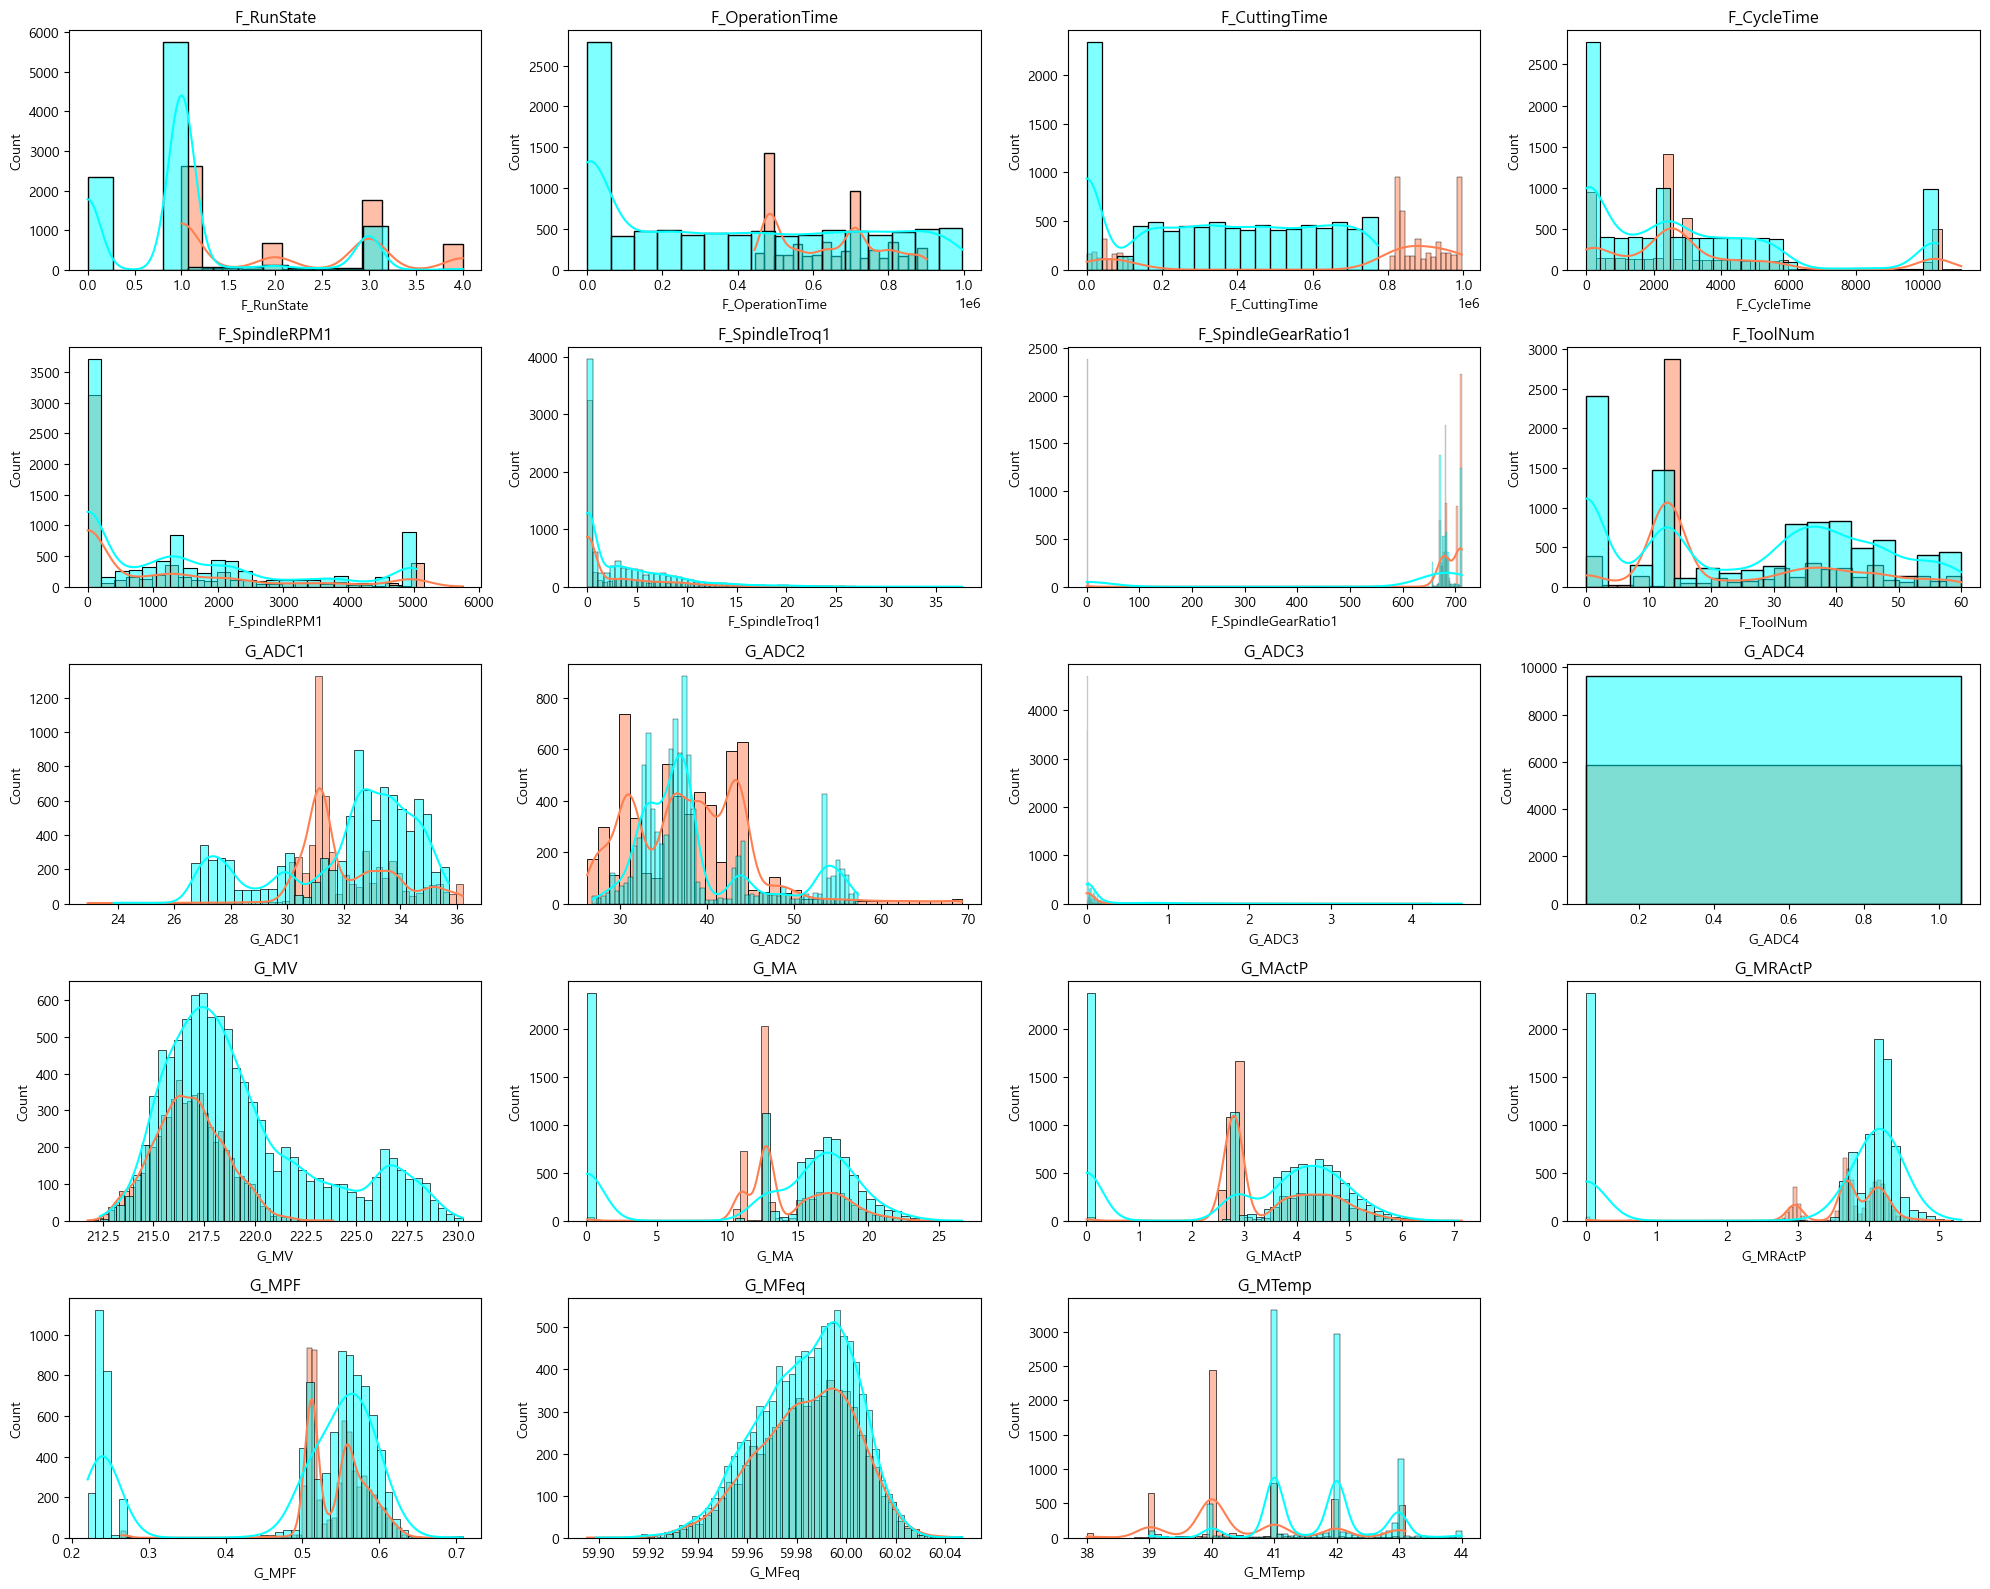

In [11]:
plt.figure(figsize=(20,16))
for i, column in enumerate(df2.columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df3[column], kde=True, color='coral')
    sns.histplot(df4[column], kde=True, color='cyan')
    plt.title(column)
plt.tight_layout()
plt.show()

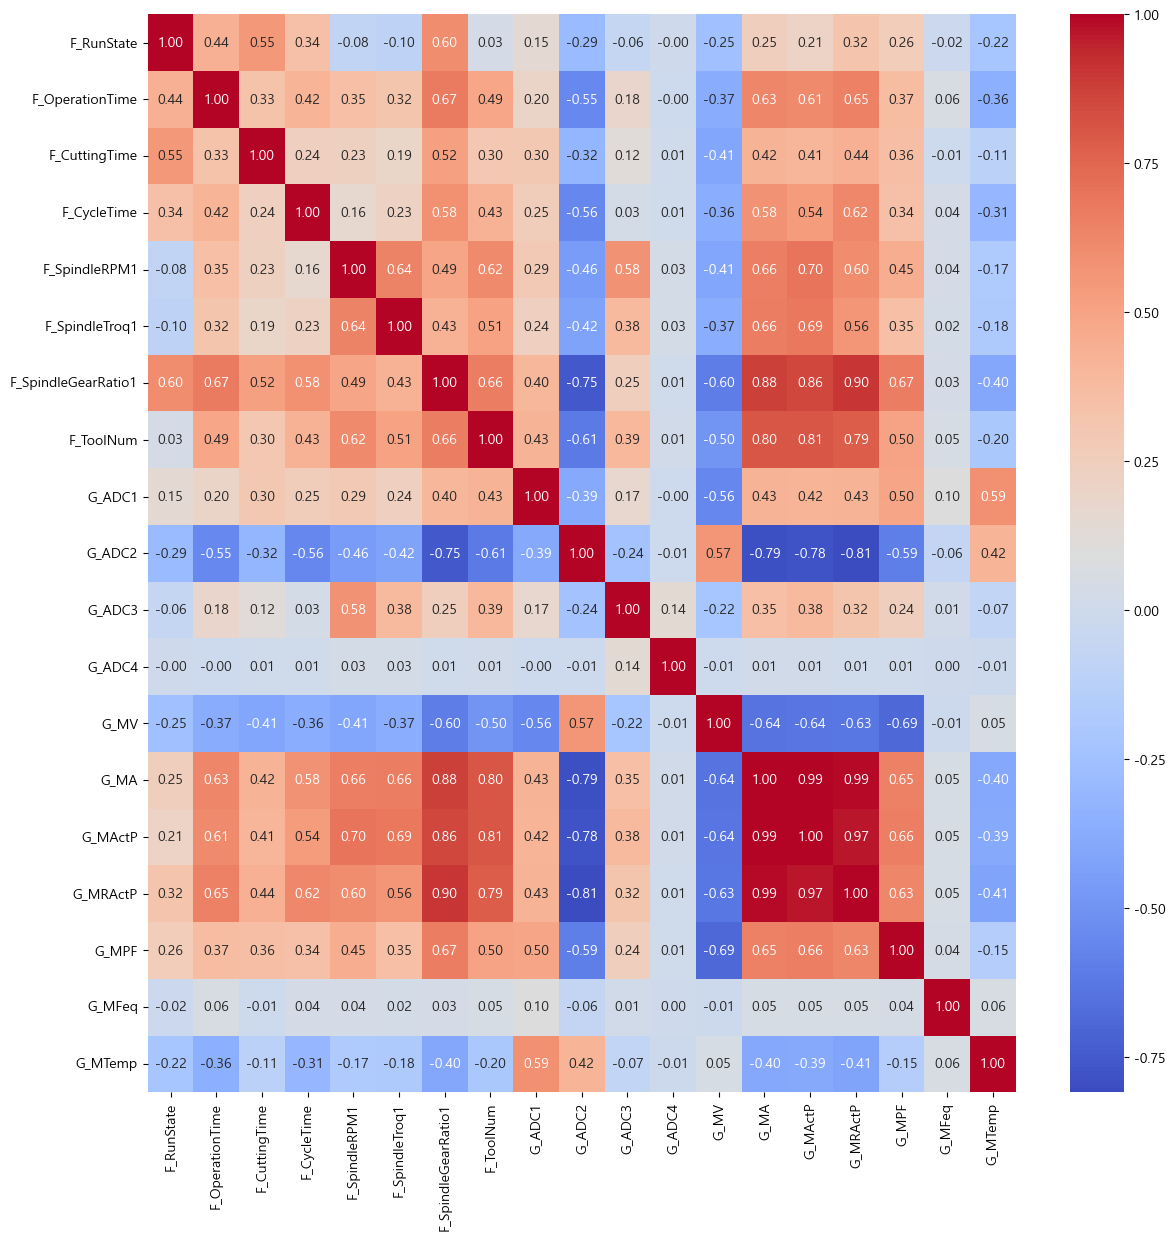

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

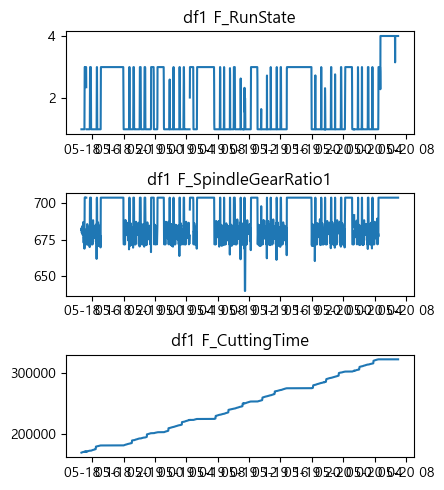

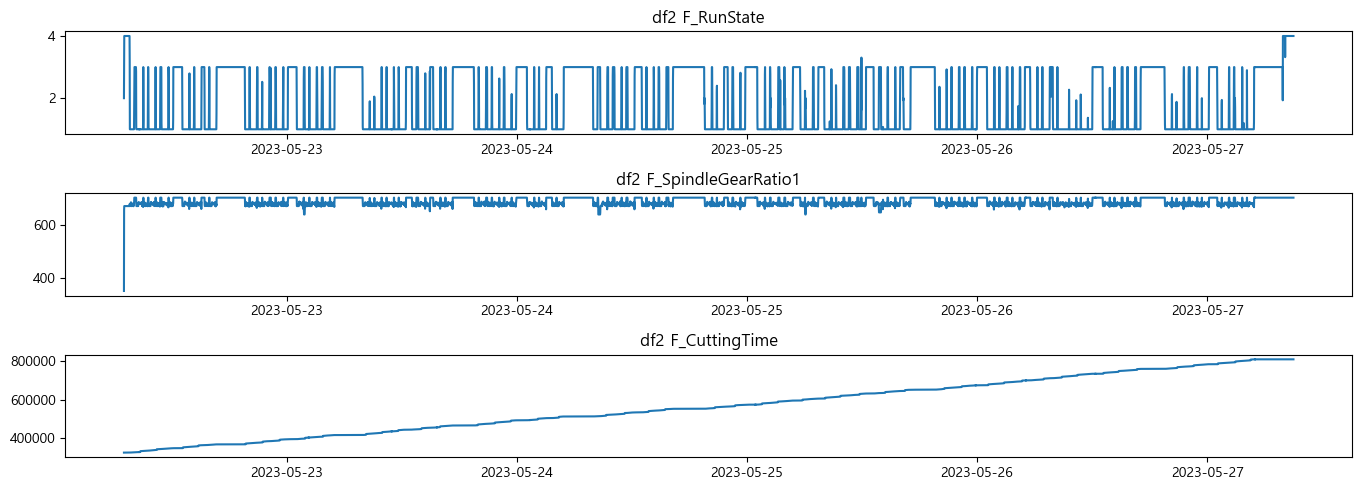

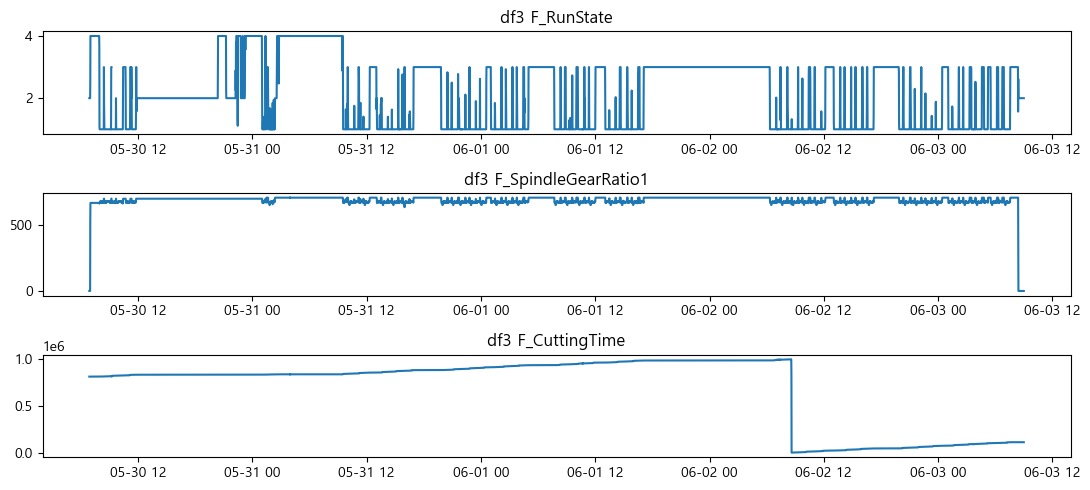

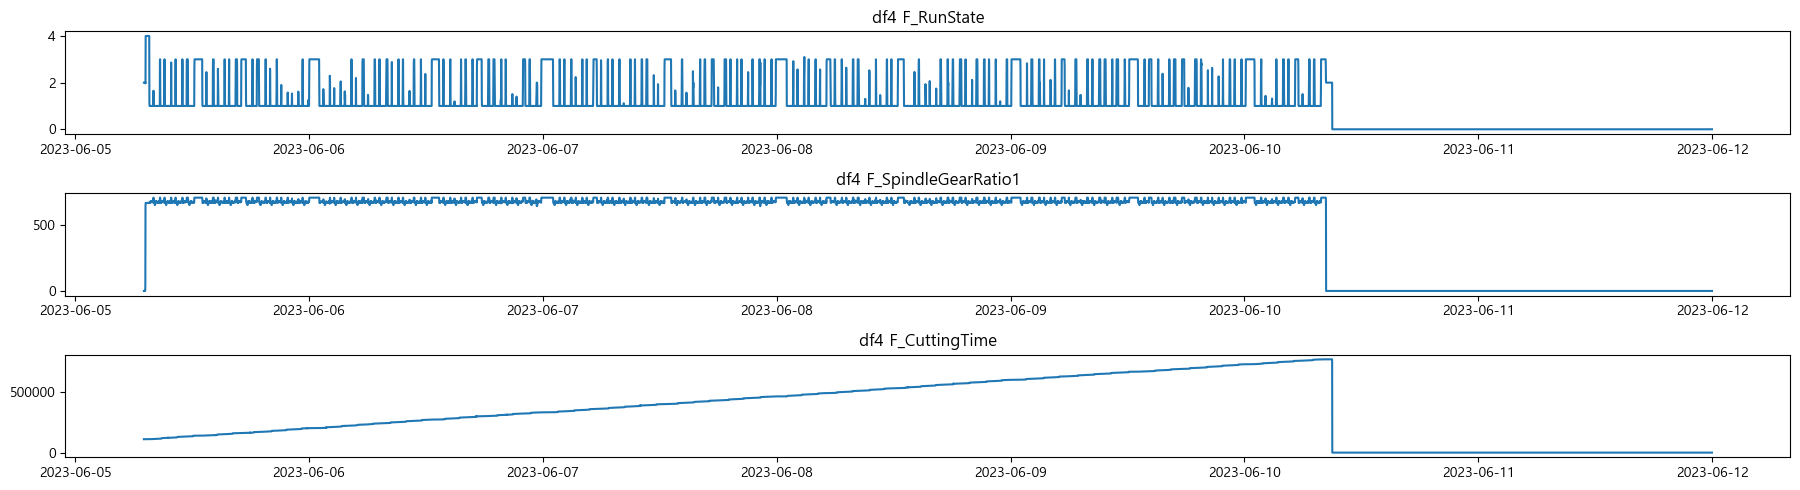

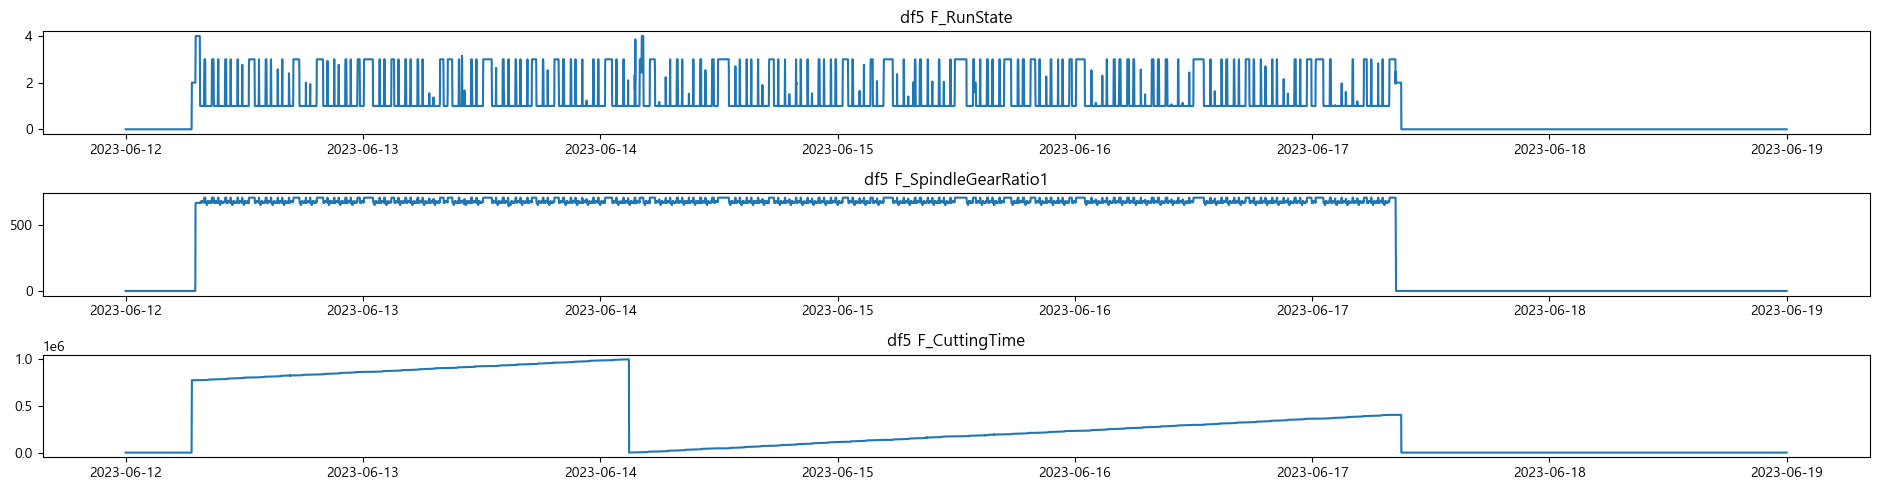

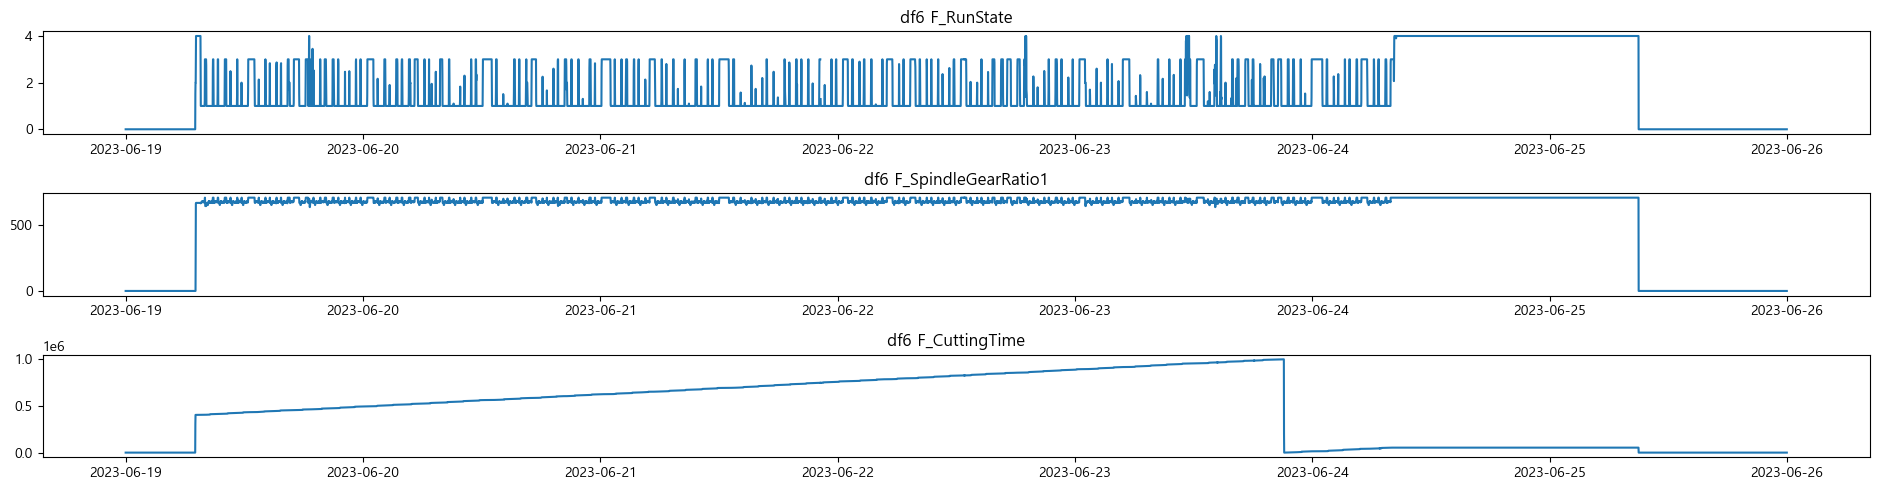

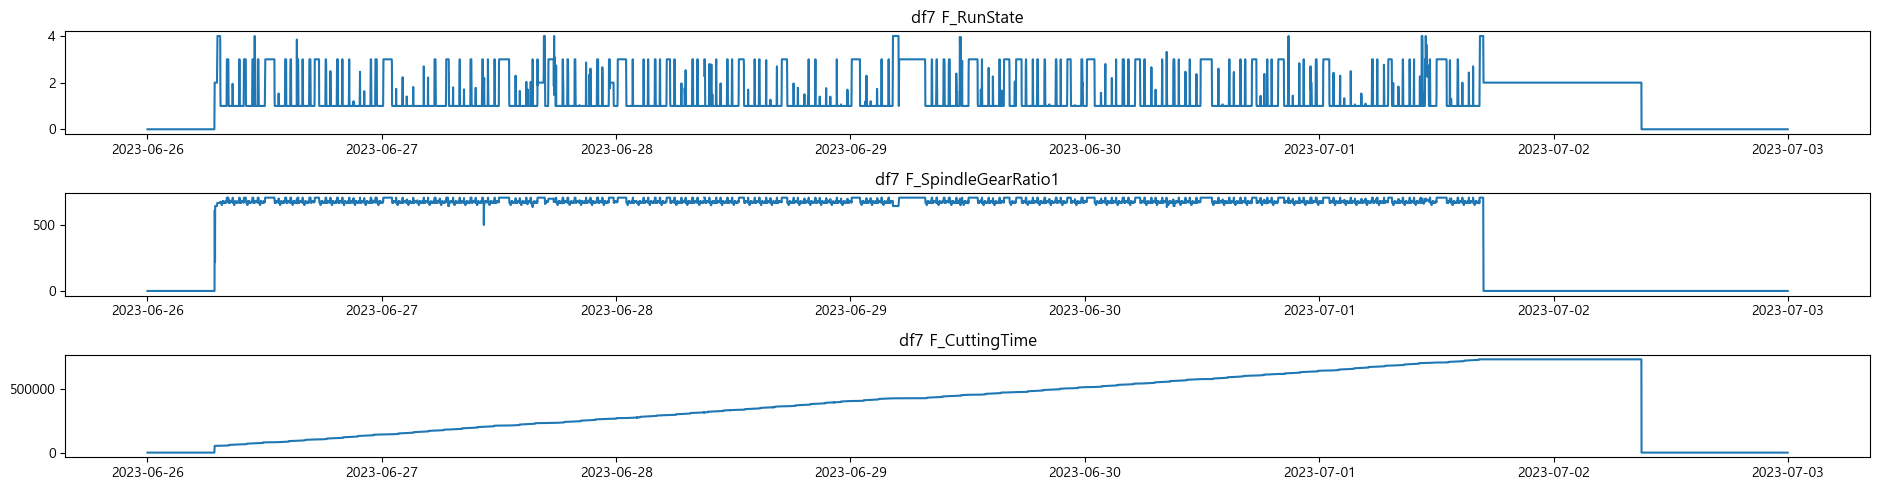

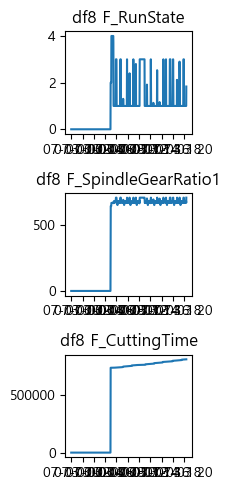

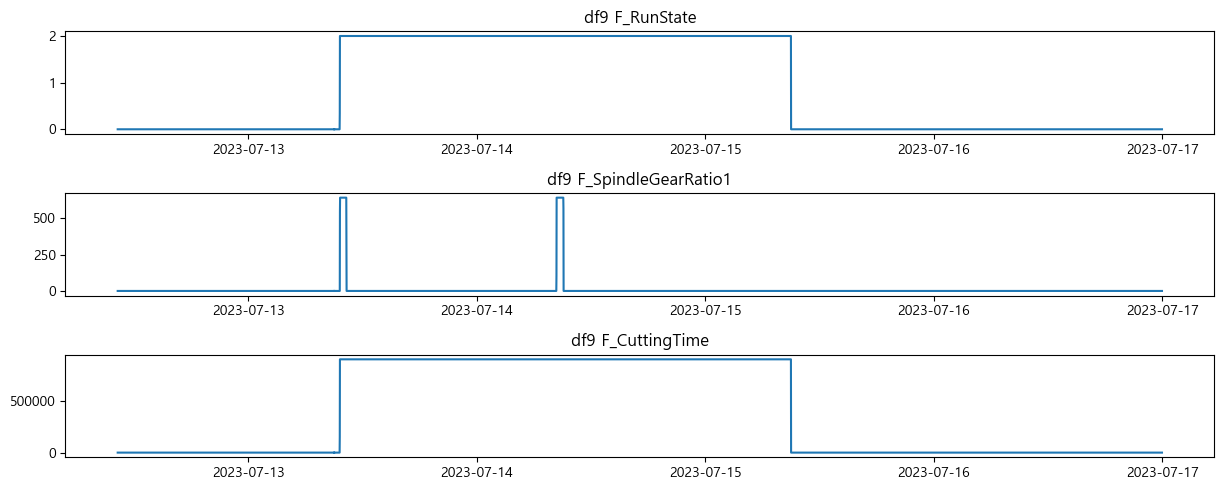

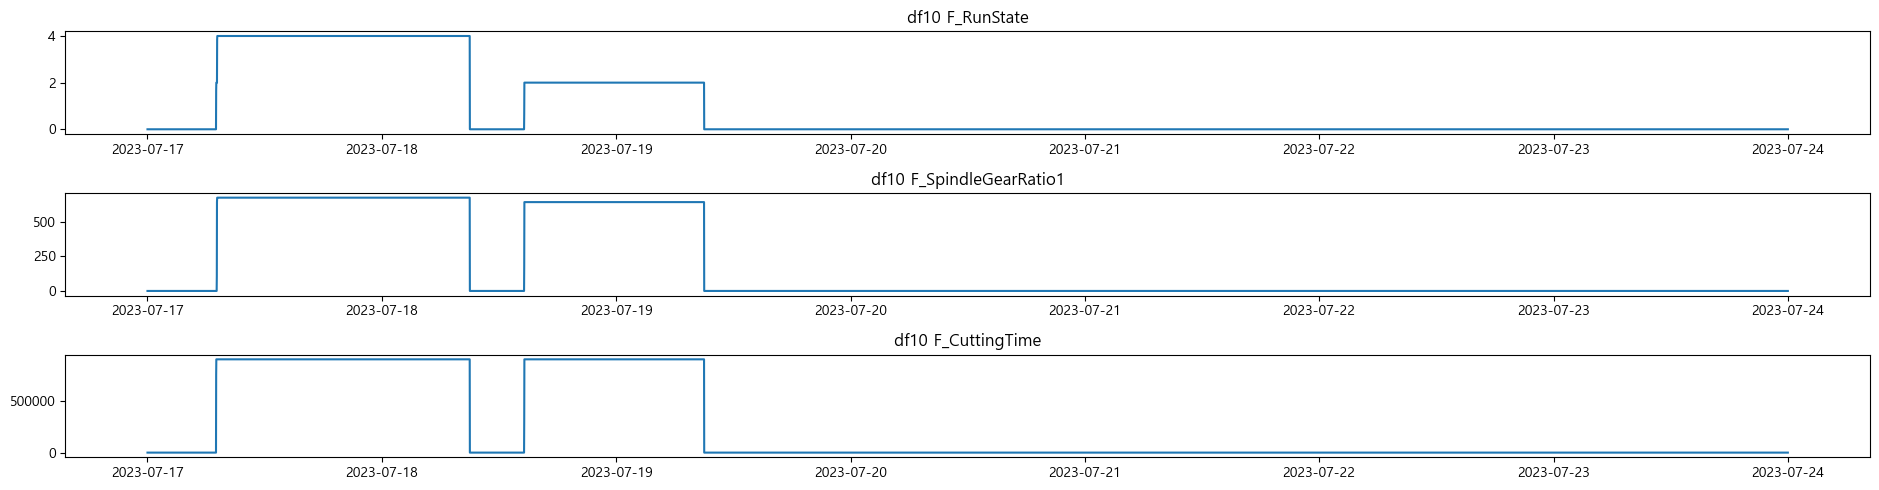

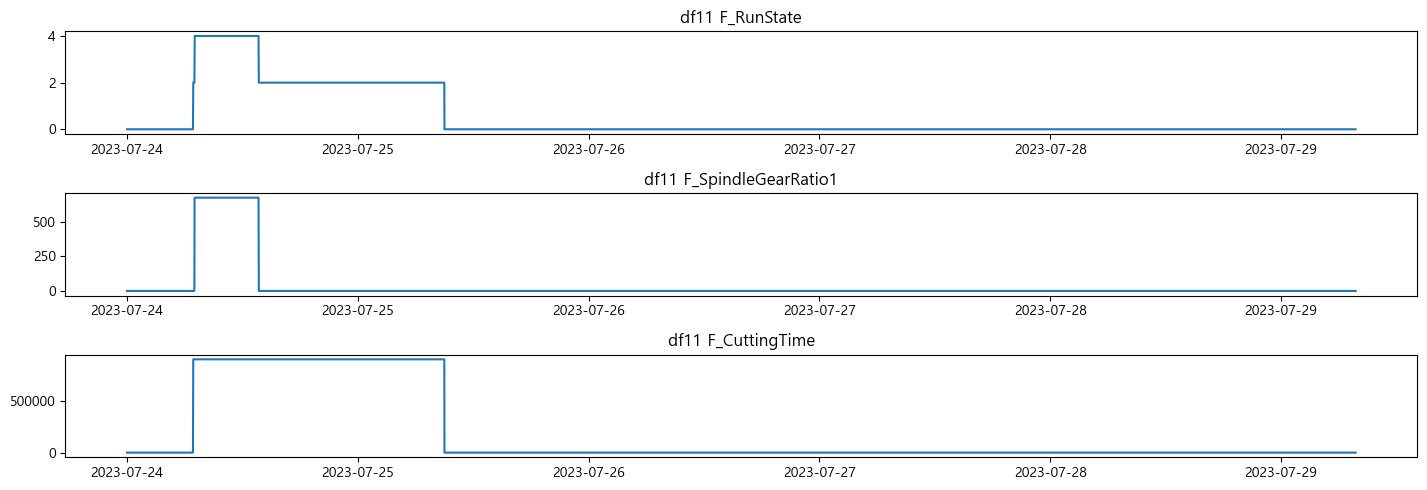

In [ ]:
for i, data in enumerate(data_list):
    drange = pd.date_range(start=data.index.astype('str')[0], end=data.index.astype('str')[-1], freq='s')

    fig, ax = plt.subplots(3, 1, figsize=(len(drange)/32000, 5))
    ax[0].plot(data.loc[data.index.min():data.index.max(), 'F_RunState'])
    ax[1].plot(data.loc[data.index.min():data.index.max(), 'F_SpindleGearRatio1'])
    ax[2].plot(data.loc[data.index.min():data.index.max(), 'F_CuttingTime'])
    ax[0].set_title(f'df{i+1} F_RunState')
    ax[1].set_title(f'df{i+1} F_SpindleGearRatio1')
    ax[2].set_title(f'df{i+1} F_CuttingTime')
    plt.tight_layout()
    plt.show()

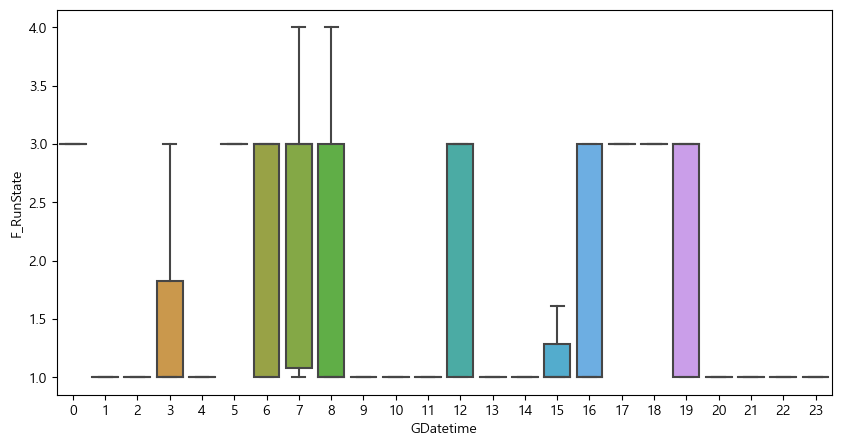

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2.index.hour.astype('str'), y=df2['F_RunState'], order=[str(i) for i in range(24)], showfliers = False)
plt.show()